# PL01 - REGRESSÃO

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Configurações para melhor visualização
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## a. Quantas linhas e colunas tem o dataset?


In [3]:
# Carregar o dataset
df_imoveis= pd.read_csv("dataset_imoveis_ml.csv")
print(f"{df_imoveis.shape[0]} imóveis e tem {df_imoveis.shape[1]} colunas")

2000 imóveis e tem 27 colunas


## Qual o preço médio, mínimo e máximo dos imóveis?

In [4]:
# b) Estatísticas da coluna preço
preco_medio = df_imoveis["preco"].mean()
preco_min = df_imoveis["preco"].min()
preco_max = df_imoveis["preco"].max()
 
print("b) Estatísticas da coluna preço:\n")
print(f"   - Preço médio: {preco_medio:,.2f} €")
print(f"   - Preço mínimo: {preco_min:,.0f} €")
print(f"   - Preço máximo: {preco_max:,.0f} €\n")
 

b) Estatísticas da coluna preço:

   - Preço médio: 244,359.70 €
   - Preço mínimo: 30,100 €
   - Preço máximo: 1,445,400 €



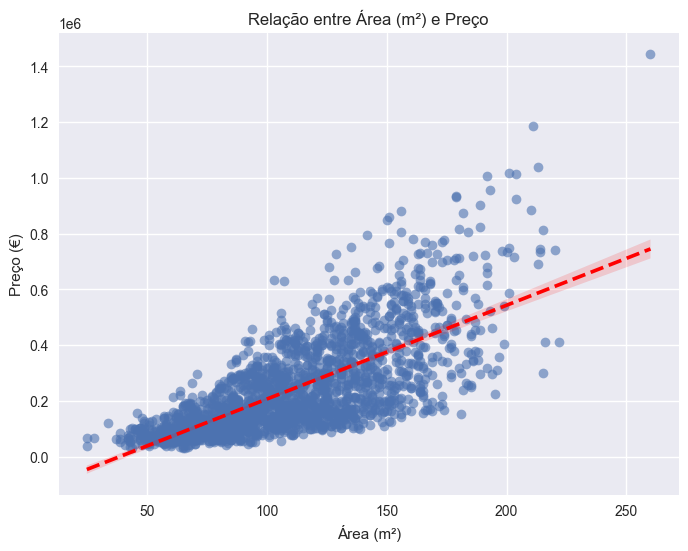

In [5]:
## Criar um gráfico de dispersão mostrando a relação entre área (m²) e preço. Adicionar uma linha de tendência. O que se observa?
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_imoveis,
    x="area_m2",
    y="preco",
    scatter_kws={"alpha":0.6},
    line_kws={"color":"red", "linestyle":"--"}
)

# Personalizar gráfico
plt.title("Relação entre Área (m²) e Preço")
plt.xlabel("Área (m²)")
plt.ylabel("Preço (€)")
plt.grid(True)
plt.show()

Como podemos observar existe uma tendência positiva em geral, o que significa que quanto maior a area do imóvel, maior será o preço.
Existe uma grande dispersão o que signfica que existem imóveis diferentes com fatores diferentes a influenciar o seu preço (tipologia, zona, estado de conservação)

In [6]:
#Informações do DataFrame
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_imovel                2000 non-null   object 
 1   tipo_imovel              2000 non-null   object 
 2   zona                     2000 non-null   object 
 3   area_m2                  2000 non-null   int64  
 4   quartos                  2000 non-null   int64  
 5   casas_banho              2000 non-null   int64  
 6   andar                    2000 non-null   int64  
 7   ano_construcao           2000 non-null   int64  
 8   estado_conservacao       2000 non-null   object 
 9   orientacao_solar         2000 non-null   object 
 10  vista                    2000 non-null   object 
 11  certificacao_energetica  2000 non-null   object 
 12  distancia_centro_km      2000 non-null   float64
 13  distancia_metro_km       2000 non-null   float64
 14  distancia_escola_km     

In [7]:
# identificar colunas a exluir
colunas_identificacao = ['id_imovel']
colunas_categoricas = ['preco_categoria']
colunas_target = ['preco']
colunas_remover = colunas_identificacao + colunas_categoricas + colunas_target
colunas_remover

['id_imovel', 'preco_categoria', 'preco']

In [8]:
#criar feature e target
x = df_imoveis.iloc[:, :-1].values
y = df_imoveis['preco']

In [9]:
# criar o x
x = df_imoveis.drop(columns = colunas_remover)

In [10]:
# Nas colunas de texto aplicar o One Hot Encoding - Imprimir n.º de colunas originais e após o One Hot Encoding
colunas_texto = x.select_dtypes(include=['object']).columns.tolist()
x = pd.get_dummies(x, columns = colunas_texto, drop_first = True)

print(f"Após One Hot Encoding: N.º de colunas: {x.shape[1]}")


Após One Hot Encoding: N.º de colunas: 49


In [11]:
# Dividir em treino e teste
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [12]:
# Normalização
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
# Criar modelo
modelo_lr_reg = LinearRegression()

In [14]:
# treinar
modelo_lr_reg.fit(x_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# Intercepto
print(f"Intercepto: {modelo_lr_reg.intercept_:.2f}")

Intercepto: 245158.00


In [16]:
# Previsão
y_pred_lr_reg = modelo_lr_reg.predict(x_test_scaled)

In [17]:
# Previsão dos 5 primeiros IMOVEIS
print(f"{'Imovel':<10} {'Real (€)':<12} {'Previsto (€)':<12} {'Erro (€)':<12} {'Erro %'}")
print("-" * 60)

for i in range(5):
    real = y_test.iloc[i]
    previsto = y_pred_lr_reg[i]
    erro = real - previsto
    erro_pct = (erro / real) * 100
    
    print(f"{i+1:<10} {real:<12.2f} {previsto:<12.2f} {erro:<12.2f} {erro_pct:>7.1f}%")

Imovel     Real (€)     Previsto (€) Erro (€)     Erro %
------------------------------------------------------------
1          76800.00     85358.58     -8558.58       -11.1%
2          280700.00    258730.51    21969.49         7.8%
3          110400.00    80714.22     29685.78        26.9%
4          91100.00     62123.26     28976.74        31.8%
5          691300.00    638610.06    52689.94         7.6%


In [18]:
# Avaliar - calcular métricas
mae = mean_absolute_error(y_test, y_pred_lr_reg)
mse = mean_squared_error(y_test, y_pred_lr_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr_reg)
valor_medio = df_imoveis['preco'].mean()

print(f"MAE: {mae :.2f}€ ({mae/valor_medio :.2%})")
print(f"RMSE: {rmse :.2f}") 
print(f"R2 Score: {r2*100:.2f}%")

print('''
O modelo de regressão linear consegue explicar cerca de 90% da variação nos preços dos imóveis a partir das variáveis usadas (área, localização,etc.).
Isso indica que o modelo está a capturar muito bem a relação entre as features e o preço''')

MAE: 39040.56€ (15.98%)
RMSE: 52856.72
R2 Score: 89.87%

O modelo de regressão linear consegue explicar cerca de 90% da variação nos preços dos imóveis a partir das variáveis usadas (área, localização,etc.).
Isso indica que o modelo está a capturar muito bem a relação entre as features e o preço


In [19]:
#NOVO IMOVEL SIMULAÇÃO

novo_imovel = {
    'quartos': 2,
    'area_m2': 75,
    'zona': 'Centro Histórico',
    'ano_construcao': 2015,
    'estado_conservacao': 'Bom'
}
novo_imovel_df = pd.DataFrame([novo_imovel])

colunas_existentes = [col for col in colunas_texto if col in novo_imovel_df.columns]
novo_imovel_df = pd.get_dummies(novo_imovel_df, columns=colunas_existentes, drop_first=True)

novo_imovel_df = novo_imovel_df.reindex(columns=x.columns, fill_value=0)

novo_imovel_scaled = scaler.transform(novo_imovel_df) # normalizar

preco_previsto = modelo_lr_reg.predict(novo_imovel_scaled)

print(f"Preço previsto para o novo imóvel: {preco_previsto[0]:.2f} €")

Preço previsto para o novo imóvel: 80771.86 €


# RANDOM FOREST REGRESSOR

In [20]:
# CRIAR E CONFIGURAR O MODELO
modelo_rf_reg = RandomForestRegressor(
    n_estimators=50,      # Aumentar nº de árvores para mais estabilidade
    max_depth=10,          # Menos profundo para reduzir sobreajuste
    min_samples_split=10,  # Divisões mais conservadoras
    min_samples_leaf=5,    # Folhas mais "cheias" reduzem variância
    max_features='sqrt',   # Usar subset de features por divisão
    oob_score=True,        # OOB para verificação interna
    bootstrap=True,        # Necessário para OOB
    random_state=42,       # Reprodutibilidade
    n_jobs=-1              # Usar todos os processadores
)

In [21]:
# Treinar o modelo e imprimir o valor do oob_score
modelo_rf_reg.fit(x_train, y_train)
print(f"OOB score: {modelo_rf_reg.oob_score_:.2%}")

OOB score: 87.61%


c:\Users\ruida\Documents\DEV\IA LVL 2\UFCD 2\PL01\env\Lib\site-packages\sklearn\ensemble\_forest.py:513: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y)


In [22]:
# Fazer previsões
y_pred_rf_reg = modelo_rf_reg.predict(x_test)

In [23]:
#NOVO IMOVEL SIMULAÇÃO

novo_imovel = {
    'quartos': 2,
    'area_m2': 75,
    'zona': 'Centro Histórico',
    'ano_construcao': 2015,
    'estado_conservacao': 'Bom'
}
novo_imovel_df = pd.DataFrame([novo_imovel])

colunas_existentes = [col for col in colunas_texto if col in novo_imovel_df.columns]
novo_imovel_df = pd.get_dummies(novo_imovel_df, columns=colunas_existentes, drop_first=True)

novo_imovel_df = novo_imovel_df.reindex(columns=x.columns, fill_value=0)

novo_imovel_scaled = scaler.transform(novo_imovel_df) # normalizar

preco_previsto = modelo_rf_reg.predict(novo_imovel_scaled)

print(f"Preço previsto para o novo imóvel: {preco_previsto[0]:.2f} €")

Preço previsto para o novo imóvel: 118038.91 €


c:\Users\ruida\Documents\DEV\IA LVL 2\UFCD 2\PL01\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [24]:
# Avaliar o modelo (métricas)
mae_rf = mean_absolute_error(y_test, y_pred_rf_reg)
mse_rf = mean_squared_error(y_test, y_pred_rf_reg)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf_reg)

print(f"""
MAE RF: {mae_rf :.2f}
MSE RF: {mse_rf :.2f}
RMSE RF: {rmse_rf :.2f}
R2 RF: {r2_rf :.2%}
      """)


MAE RF: 37243.26
MSE RF: 2767650584.73
RMSE RF: 52608.46
R2 RF: 89.97%
      


In [25]:
# imprimir a importância das variáveis
importances = pd.DataFrame({
    'feature' : x_train.columns,
    'importance' : modelo_rf_reg.feature_importances_
}).sort_values('importance', ascending = False)

In [26]:
#TOP 5 DE FEATURES IMPORTANTES
for i, row in importances.head(5).iterrows():
    barra = '█' * int(row['importance'] * 50)
    print(f" {row['feature']:20} {barra} {row['importance']*100 :.2f}%")


 area_m2              ███████████ 22.43%
 zona_Zona Premium    █████ 11.23%
 distancia_centro_km  █████ 10.61%
 quartos              █████ 10.48%
 tipo_imovel_Penthouse ███ 7.77%


In [27]:
# Comparar os resultados entre Linear e o RF
print(f"\n{'Métrica':<20} {'Regressão Linear':<20} {'Random Forest':<20} {'Vencedor'}")
print("-" * 70)
melhor_mae = "RF ✅" if mae_rf < mae else "Linear ✅"
print(f"{'MAE':<20} €{mae:<19.2f} €{mae_rf:<19.2f} {melhor_mae}")
melhor_rmse = "RF ✅" if rmse_rf < rmse else "Linear ✅"
print(f"{'RMSE':<20} €{rmse:<19.2f} €{rmse_rf:<19.2f} {melhor_rmse}")
melhor_r2 = "RF ✅" if r2_rf > r2 else "Linear ✅"
print(f"{'R² Score':<20} {r2:<20.3f} {r2_rf:<20.3f} {melhor_r2}")


Métrica              Regressão Linear     Random Forest        Vencedor
----------------------------------------------------------------------
MAE                  €39040.56            €37243.26            RF ✅
RMSE                 €52856.72            €52608.46            RF ✅
R² Score             0.899                0.900                RF ✅


# 1. Qual modelo teve melhor desempenho?
### RANDOM FOREST

# 2. O que isto sugere sobre a natureza dos dados?

### O dataset é relativamente “limpo” e estruturado.
### A relação entre variáveis e preços dos imóveis é em grande parte linear
### Tem apenas alguns outliers

# Qual previsão o aluno considera mais credível e porquê?


### Embora a diferença entre os modelos seja mínima, o Random Forest apresentou desempenho superior em todas as métricas (MAE, RMSE e R²). Isso sugere que, mesmo que os dados sejam em grande parte lineares, há pequenas não-linearidades ou variações que o Random Forest consegue capturar melhor. Assim, ele tende a cometer menos erros que a Regressão Linear, independentemente da presença de outliers.